# Machine learning

## Little inspection

In [1]:
# importing librairies ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

# %matplotlib notebook

In [2]:
# Allow to print multiple output 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Importing CLEANED Dataset
df = pd.read_csv('./dataset/immo_collect_clean.csv', index_col = 0)
df.shape
df.head()

(34042, 17)

,postal_code,type_of_property,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,is_new,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
6,1650,0,525000,4,220,1,1,1,0,Beersel,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.851322
9,1332,0,549000,4,210,1,1,1,1,Rixensart,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-3.410265
10,8310,0,519000,3,273,1,0,1,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
12,8200,0,535000,4,200,1,1,1,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
13,1421,0,105000,1,82,0,0,1,0,Braine-l'Alleud,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-2.645463


In [4]:
# I retrieve only utils columns for my model

df = df.iloc[:,0:9]
df = df.drop(columns=['garden'])

df.head()


,postal_code,type_of_property,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new
6,1650,0,525000,4,220,1,1,0
9,1332,0,549000,4,210,1,1,1
10,8310,0,519000,3,273,1,0,1
12,8200,0,535000,4,200,1,1,1
13,1421,0,105000,1,82,0,0,0


In [5]:
df.isna().sum()

postal_code               0
type_of_property          0
price                     0
number_of_bedroom         0
house_area                0
fully_equipped_kitchen    0
terrace                   0
is_new                    0
dtype: int64

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

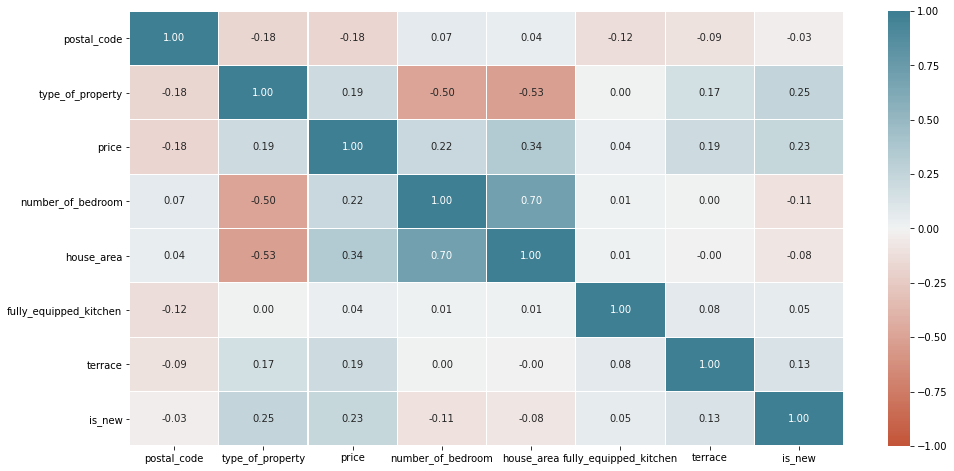

In [6]:

# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34042 entries, 6 to 47809
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   postal_code             34042 non-null  int64
 1   type_of_property        34042 non-null  int64
 2   price                   34042 non-null  int64
 3   number_of_bedroom       34042 non-null  int64
 4   house_area              34042 non-null  int64
 5   fully_equipped_kitchen  34042 non-null  int64
 6   terrace                 34042 non-null  int64
 7   is_new                  34042 non-null  int64
dtypes: int64(8)
memory usage: 2.3 MB


## Preparing the data

### Defines variables

In [8]:
X = df.drop(columns=['price'])
X.head()

,postal_code,type_of_property,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new
6,1650,0,4,220,1,1,0
9,1332,0,4,210,1,1,1
10,8310,0,3,273,1,0,1
12,8200,0,4,200,1,1,1
13,1421,0,1,82,0,0,0


In [9]:
y = df[['price']]
y.head()

,price
6,525000
9,549000
10,519000
12,535000
13,105000


### Split our dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [11]:
# X_train
# y_test

### Scale our data

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = MinMaxScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train[0]

array([0.17793594, 1.        , 0.33333333, 0.48134328, 1.        ,
       1.        , 0.        ])

## Let's training with different algo for demo

### Linear Regression

In [13]:
regressor = linear_model.LinearRegression()

In [14]:
regressor.fit(X_train, y_train) # Entrainement du model

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
score = regressor.score(X_train,y_train)
score